### Initial attempt to join the different datasets

Notes: Need to resolve how to deal with different seasons that have different scores/release dates/ genre. 
- Pick the farthest date?
- Average scores?
- Most occuring Genre?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import RocCurveDisplay, recall_score, precision_score, roc_curve, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
main=pd.read_csv('all-weeks-global.csv')
movies=pd.read_csv('bestmovies.csv')
shows=pd.read_csv('bestshows.csv')
globai=pd.read_csv('whatwewatch.csv')
type(globai)

pandas.core.frame.DataFrame

In [3]:
main['is_staggered_launch']=main['Unnamed: 9']

In [4]:
def strip_season(title):
    return title.split(': Season')[0].strip()

globai['Title'] = globai['Title'].apply(strip_season)

In [5]:
# globai=globai.groupby('Title')[['Title','Available Globally?','Release Date']]


In [6]:
globai

,Unnamed: 0,Title,Available Globally?,Release Date,Hours Viewed,Unnamed: 5
0,NaN,The Night Agent,Yes,2023-03-23,"812,100,000",NaN
1,NaN,Ginny & Georgia,Yes,2023-01-05,"665,100,000",NaN
2,NaN,The Glory,Yes,2022-12-30,"622,800,000",NaN
3,NaN,Wednesday,Yes,2022-11-23,"507,700,000",NaN
4,NaN,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000",NaN
...,...,...,...,...,...,...
18209,NaN,راس السنة,No,NaN,"100,000",NaN
18210,NaN,心が叫びたがってるんだ。,No,NaN,"100,000",NaN
18211,NaN,두근두근 내 인생,No,NaN,"100,000",NaN
18212,NaN,라디오 스타,No,NaN,"100,000",NaN


In [7]:
main=main[['week', 'category','show_title', 'weekly_hours_viewed', 'runtime', 'weekly_views', 'cumulative_weeks_in_top_10', 'is_staggered_launch']]
globai=globai[['Title','Available Globally?','Release Date']].set_index('Title')
shows=shows[['TITLE','MAIN_GENRE','SCORE','NUMBER_OF_VOTES', 'MAIN_PRODUCTION', 'NUMBER_OF_SEASONS' ]].set_index('TITLE')
movies=movies[['TITLE','MAIN_GENRE','SCORE','NUMBER_OF_VOTES', 'MAIN_PRODUCTION' ]].set_index('TITLE')

showsmovies = pd.concat([shows, movies], axis=0)

In [8]:
showsmovies

,MAIN_GENRE,SCORE,NUMBER_OF_VOTES,MAIN_PRODUCTION,NUMBER_OF_SEASONS
TITLE,,,,,
Breaking Bad,drama,9.5,1727694,US,5.0
Avatar: The Last Airbender,scifi,9.3,297336,US,3.0
Our Planet,documentary,9.3,41386,GB,1.0
Kota Factory,drama,9.3,66985,IN,2.0
The Last Dance,documentary,9.1,108321,US,1.0
...,...,...,...,...,...
The Trip,comedy,6.9,19706,NO,NaN
The Dirt,drama,6.9,47603,US,NaN
Top Gun,drama,6.9,329656,US,NaN


In [9]:
new=main.join(globai, on='show_title', how='left')
new2=new.join(showsmovies, on='show_title', how='left')
new2

,week,category,show_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,Available Globally?,Release Date,MAIN_GENRE,SCORE,NUMBER_OF_VOTES,MAIN_PRODUCTION,NUMBER_OF_SEASONS
0,2024-03-24,Films (English),Irish Wish,40000000,1.5667,25500000.0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-24,Films (English),Damsel,35700000,1.8333,19500000.0,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-03-24,Films (English),Shooter,11700000,2.0833,5600000.0,5,False,No,2016-11-16,war,7.5,35547.0,US,3.0
2,2024-03-24,Films (English),Shooter,11700000,2.0833,5600000.0,5,False,No,2016-11-16,thriller,7.2,329417.0,US,NaN
2,2024-03-24,Films (English),Shooter,11700000,2.0833,5600000.0,5,False,No,2018-06-22,war,7.5,35547.0,US,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,2021-07-04,TV (Non-English),Elite,10140000,NaN,NaN,1,False,Yes,2020-03-13,NaN,NaN,NaN,NaN,NaN
5717,2021-07-04,TV (Non-English),Elite,10140000,NaN,NaN,1,False,Yes,2021-06-18,NaN,NaN,NaN,NaN,NaN
5718,2021-07-04,TV (Non-English),Katla,9190000,NaN,NaN,1,False,Yes,2021-06-17,NaN,NaN,NaN,NaN,NaN
5719,2021-07-04,TV (Non-English),Record of Ragnarok,9140000,NaN,NaN,1,False,No,2023-01-26,NaN,NaN,NaN,NaN,NaN


# Dealing with NaN values

In [10]:
def size_if_na_dropped(df):
  print(f"Out of {df.shape[0]} total points, if we drop all with missing data, \
we'll have {df.dropna().shape[0]} points (or {df.dropna().shape[0]/df.shape[0]} \
  of the original dataset)")

size_if_na_dropped(new2)

Out of 8319 total points, if we drop all with missing data, we'll have 192 points (or 0.02307969707897584   of the original dataset)


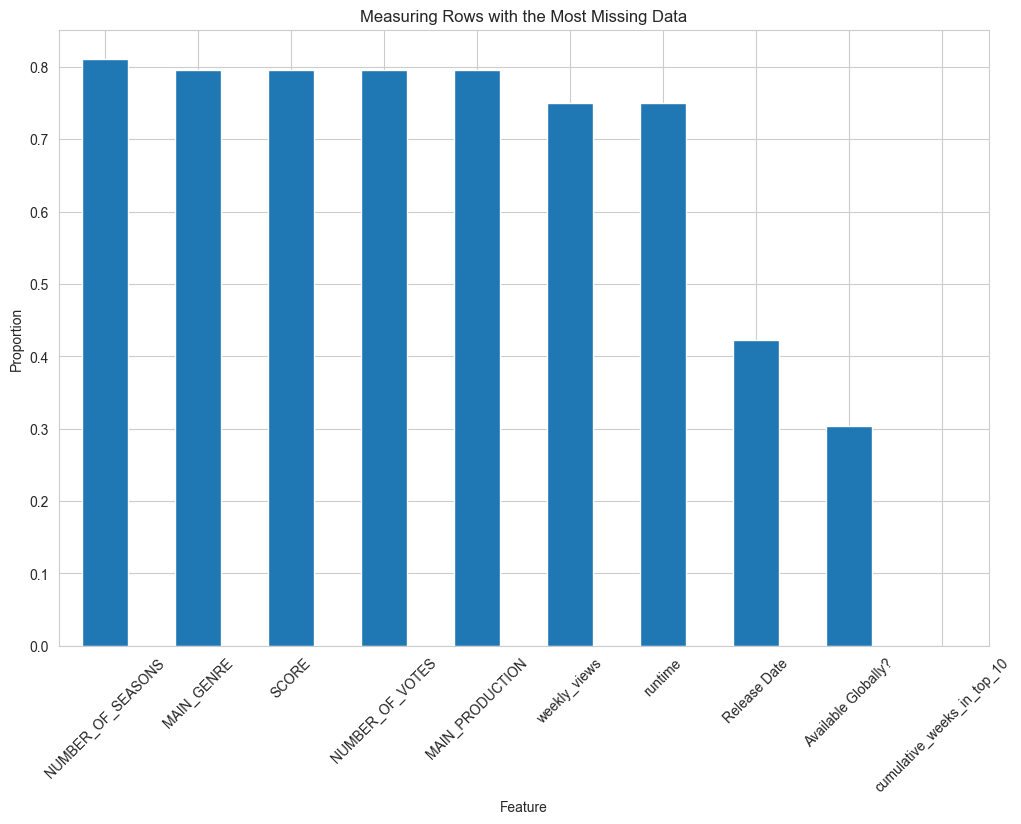

In [11]:
def plot_na(df):
  sns.set_style('whitegrid')
  plt.figure(figsize=(12,8))
  missing_vals = df.isna().sum()/df.shape[0]
  missing_vals = missing_vals.sort_values(ascending=False)[0:10]
  ax = missing_vals.plot(kind='bar')

  ax.set_title('Measuring Rows with the Most Missing Data')
  ax.set_ylabel('Proportion')
  ax.set_xlabel('Feature')
  ax.tick_params(axis='x', rotation=45)

plot_na(new2)

### NUMBER_OF_SEASONS

^^ Number of seasons is probably high because movies have an Nan
- replace with 0?
  
Investigate further why weekly_views and runtime are high if these come from the main dataset


Proceeding to replace NaN for 'NUMBER_OF_SEASONS' shows with 0

Out of 8319 total points, if we drop all with missing data, we'll have 203 points (or 0.024401971390792164   of the original dataset)


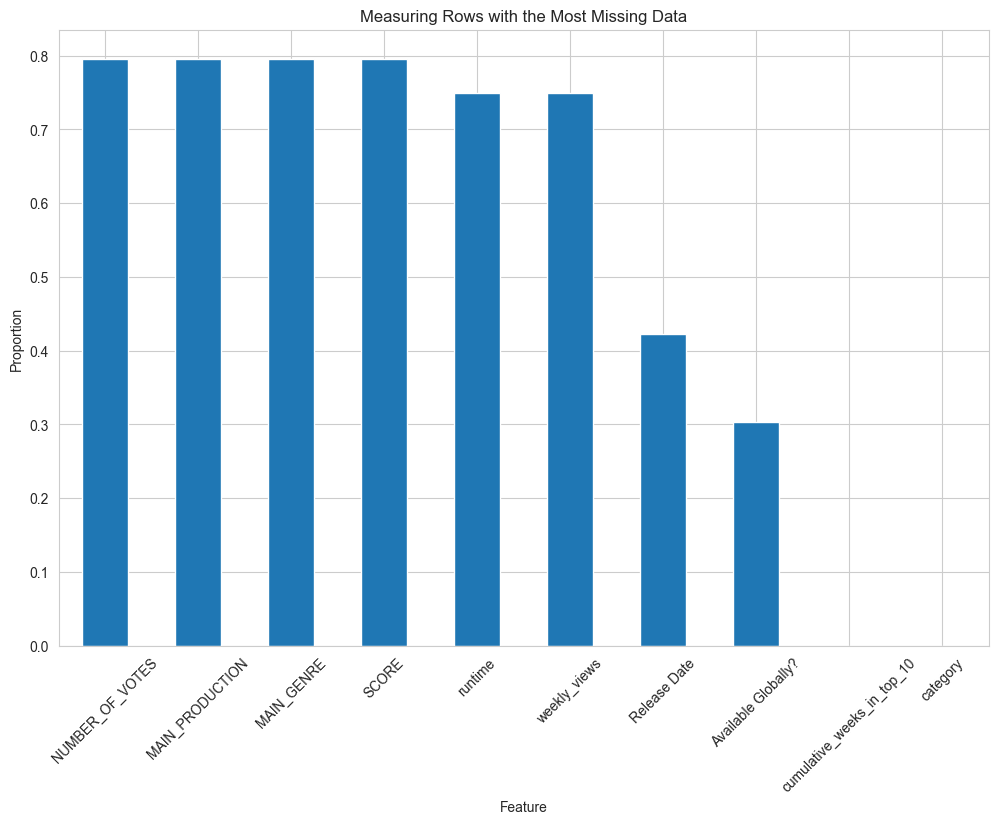

In [12]:
comb_df = new2
comb_df['NUMBER_OF_SEASONS'] = comb_df['NUMBER_OF_SEASONS'].fillna(0)
# print(comb_df['NUMBER_OF_SEASONS'].isna().sum())

plot_na(comb_df)
size_if_na_dropped(comb_df)

### MAIN_GENRE and Scraping
We retrieve the genre information from the Rotten Tomatoes website since it is well-known and if frequently updated. Before scraping, we inspected the website using /robots.txt. We then proceeded scraping the information while complying with the instructions posted on the page.

The code used to scrape can be found in web_crawler.py

In [13]:
#the size of the remaining dataset is still too small when we drop all remaining nan values 
from unidecode import unidecode

na_genre = comb_df[comb_df['MAIN_GENRE'].isna()]

na_genre_cols = ['category', 'show_title','week']
na_genre = na_genre[na_genre_cols]
print("shape of na_genre initially: ", na_genre.shape)

def mapping_category(string):
  ''' 
  Method to find the category which will later be used in url parsing 
  '''
  string = unidecode(string)

  if(string=="Films (English)"):
    string = "m"
  else:
    string = "tv"
  # print(string)
  return string

def mapping_title(name):
  '''
  Method to find the title name which will later be used in url parsing
  '''
  name = unidecode(name)
  name = name.lower()
  #removing all punctuation
  # https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
  punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for punctuation in punctuation:
    name = name.replace(punctuation, '')
  list = name.split()
  return "_".join(list)

def alt_mapping_category(string):
  """
  Method to find the category which will later be used in url parsing just in case 
  given category was incorrectly listed 
  """
   

  #in case the type was incorrectly listed 
  string = unidecode(string)
  if(string=="m"):
    string = "tv"
  else:
    string = "m"
  # print(string)
  return string

def mapping_year(week):
  """
  Method to find the release year which will later be used in url parsing in the
  case that shows have duplicate names 
  """
  return week[:4]

na_genre['category'] = na_genre['category'].map(mapping_category)

na_genre['show_title'] = na_genre['show_title'].map(mapping_title)

na_genre['category2'] = na_genre['category'].map(alt_mapping_category)

na_genre['year'] = na_genre['week'].map(mapping_year)

na_genre["url"] = "https://www.rottentomatoes.com/" + na_genre["category"]+"/"+na_genre['show_title']+"_"+na_genre['year'] #first try

na_genre["url2"] = "https://www.rottentomatoes.com/" + na_genre["category"]+"/"+na_genre['show_title'] #second try 

na_genre["url3"] = "https://www.rottentomatoes.com/" + na_genre["category2"]+"/"+na_genre['show_title']+"_"+na_genre['year'] #third try

na_genre["url4"] = "https://www.rottentomatoes.com/" + na_genre["category2"]+"/"+na_genre['show_title'] #fourth try 

na_genre = na_genre.drop_duplicates(subset=['show_title'])

pd.set_option('display.max_columns', None)

na_genre.to_csv("output_filename.csv", index=False, encoding='utf8')

# na_genre.head(50)

shape of na_genre initially:  (6617, 3)


In [14]:
na_genre.reset_index(drop=True)
import web_crawler as wc

/Users/andreasiby/Documents/messy data/Project/ORIE4741FinalProject/libs/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [15]:
url_df = na_genre[['url','url2','url3','url4']]
url_df.head()

,url,url2,url3,url4
0,https://www.rottentomatoes.com/m/irish_wish_2024,https://www.rottentomatoes.com/m/irish_wish,https://www.rottentomatoes.com/tv/irish_wish_2024,https://www.rottentomatoes.com/tv/irish_wish
1,https://www.rottentomatoes.com/m/damsel_2024,https://www.rottentomatoes.com/m/damsel,https://www.rottentomatoes.com/tv/damsel_2024,https://www.rottentomatoes.com/tv/damsel
3,https://www.rottentomatoes.com/m/ford_v_ferrar...,https://www.rottentomatoes.com/m/ford_v_ferrari,https://www.rottentomatoes.com/tv/ford_v_ferra...,https://www.rottentomatoes.com/tv/ford_v_ferrari
4,https://www.rottentomatoes.com/m/the_casagrand...,https://www.rottentomatoes.com/m/the_casagrand...,https://www.rottentomatoes.com/tv/the_casagran...,https://www.rottentomatoes.com/tv/the_casagran...
5,https://www.rottentomatoes.com/m/hellboy_2024,https://www.rottentomatoes.com/m/hellboy,https://www.rottentomatoes.com/tv/hellboy_2024,https://www.rottentomatoes.com/tv/hellboy


In [16]:
scrapped_name, scrapped_cat = wc.automate_data_collection(url_df.to_numpy(), 3)

IS MOVIE
IRISH WISH
2024, Romance/Comedy, 1h 33m
40%
TOMATOMETER
57 Reviews
43%
AUDIENCE SCORE
250+ Ratings
IS MOVIE
DAMSEL
R 2018, Comedy/Western, 1h 53m
68%
TOMATOMETER
118 Reviews
53%
AUDIENCE SCORE
500+ Ratings
IS MOVIE
FORD V FERRARI
PG-13 2019, History/Drama, 2h 32m
92%
TOMATOMETER
360 Reviews
98%
AUDIENCE SCORE
10,000+ Verified Ratings
['m', 'm', 'm']


In [18]:
print(scrapped_name)
print(scrapped_cat)

['IRISH WISH\n2024, Romance/Comedy, 1h 33m\n40%\nTOMATOMETER\n57 Reviews\n43%\nAUDIENCE SCORE\n250+ Ratings', 'DAMSEL\nR 2018, Comedy/Western, 1h 53m\n68%\nTOMATOMETER\n118 Reviews\n53%\nAUDIENCE SCORE\n500+ Ratings', 'FORD V FERRARI\nPG-13 2019, History/Drama, 2h 32m\n92%\nTOMATOMETER\n360 Reviews\n98%\nAUDIENCE SCORE\n10,000+ Verified Ratings']
['m', 'm', 'm']
